# Я-профессионал. Демоверсия отоборочного этапа 2020-2021. Машинное обучение

В этом занятии разберем более продвинутое решение задачи демо-верссии отборочного тура Я-профи.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import pandas as pd
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,57,technician,married,secondary,no,950,yes,no,cellular,9,jul,1272,1,-1,0,unknown,no
1,34,technician,single,tertiary,no,925,yes,no,cellular,13,apr,709,1,-1,0,unknown,yes
2,41,blue-collar,single,secondary,no,75,yes,no,unknown,1,jul,479,9,-1,0,unknown,yes
3,46,technician,single,tertiary,no,4414,no,no,cellular,18,aug,504,7,-1,0,unknown,yes
4,28,unknown,single,secondary,no,4465,no,no,cellular,28,jan,769,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7808,47,management,married,tertiary,no,761,yes,no,cellular,11,jul,80,2,-1,0,unknown,no
7809,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
7810,35,technician,married,secondary,no,1144,no,no,cellular,20,aug,197,13,-1,0,unknown,no
7811,51,retired,married,tertiary,no,746,no,no,cellular,25,aug,372,5,-1,0,unknown,yes


In [ ]:
data = df_train.copy()

# Подготовка данных

В предыдущем разборе мы с вами смотрели исследвание данных:
- типы данных
- размерность
- пропуски в данных
- и т.д.

В этот раз не будем на этом останавливаться, а перейдем сразу к обработке и подготовке данных.

После того как мы исследовали наши данные, из необходимо подготовить для алгоритмов машинного обучения.

1. Обработать пропуски, если таковые сущетсвуют - из исследования данных, у нас отсуствуют пропущенные значения в датасете
2. Сбалансировать классы, если это необходимо - из исследования данных мы видели, что соотношение классов примерно 50 на 50, так что тут все хорошо
3. Обработать категориальные признаки
4. Создать наборы для обучения и для тестирования
5. Выделить вектор признаков и вектор ответов (целевой переменной)

## Обработка категориальных признаков

**Категориальные** признаки называют по-разному: **факторными**, **номинальными**. Их значения определяют факт принадлежности к какой-то категории. 

Примеры таких признаков: пол, страна проживания, номер группы, категория товаров и т.п. Ясно, что для компьютерной обработки вместо «понятного для человека» значения (в случае страны — ‘Russia’, ‘GB’, ‘France’ и т.п.) хранят числа. 

Существуют разные способы кодирования категориальных признаков:
1. Простейший кодировщий `sklearn.preprocessing.LabelEncoder`, который каждой категории сопоставляет некоторое целое число (собственно, номер категории).

Например, существует категориальная переменная:

```markdown
   |  Статус вакцинации |
---|--------------------|
1  |    Вакцинирован    |
2  |  Не вакцинирован   |
3  |     Мед отвод      |
4  |     Мед отвож      |
5  |  Не вакцинирован   |
6  |    Вакцинирован    |

```

После применения кодирования с помощью LabelEncoder получаем следущее (собственно он закодировал наши категориальные переменные: Вакцинирован = 0, Не вакцинирован = 1, Мед отвод = 2):

```markdown
   |  Статус вакцинации |
---|--------------------|
1  |         0          |
2  |         1          |
3  |         2          |
4  |         2          |
5  |         1          |
6  |         0          |

```

2. Метод библиотеки Pandas:

`pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)[source]`

Например, существует категориальная переменная:

```markdown
   |  Статус вакцинации |
---|--------------------|
1  |    Вакцинирован    |
2  |  Не вакцинирован   |
3  |     Мед отвод      |
4  |     Мед отвож      |
5  |  Не вакцинирован   |
6  |    Вакцинирован    |

```

Метод принимает категориальную переменную в качестве аргумента. Далее создает новую переменную для каждой категории, так что каждая фиктивная переменная содержит данные 1 или 0. 1 - указывает на наличие определенной категории и 0 - указывает на отсутствие этой категории.

```markdown
   | Статус вакцинации | Вакцинирован | Не вакцинирован | Мед отвод |
---|-------------------|--------------|-----------------|-----------|
1  |   Вакцинирован    |      1       |        0        |     0     |
2  | Не вакцинирован   |      0       |        1        |     0     |
3  |    Мед отвод      |      0       |        0        |     1     |
4  |    Мед отвод      |      0       |        0        |     1     |
5  | Не вакцинирован   |      0       |        1        |     0     |
6  |   Вакцинирован    |      1       |        0        |     0     |

```

Числовые признаки:
- age
- balance
- day
- duration
- campaign
- pdays
- previous

Категориальные признаки:
- job
- marital
- education
- default
- housing
- loan
- contract
- month
- poutcome

In [ ]:
df_train = pd.get_dummies(df_train, columns=['job', 'marital', 'education', 'default',
                                             'housing', 'loan', 'contact', 'month', 'poutcome'])

df_train.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,57,950,9,1272,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,34,925,13,709,1,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,41,75,1,479,9,-1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,46,4414,18,504,7,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,28,4465,28,769,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# преобразуем целевую переменную из категориальной
# в прошлый раз мы делали это с помощью ручной замены
# но в случае если у нас будет 100 категорий? делать словарь для 100 категорий - не рациональная задача

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df_train['deposit']) 
df_train['deposit'] = label_encoder.transform(df_train['deposit']) 

df_train.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,57,950,9,1272,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,34,925,13,709,1,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,41,75,1,479,9,-1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,46,4414,18,504,7,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,28,4465,28,769,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_train['balance'].mean() - 1000
df_train['age'].mean() - 50

df_train['job_housemaid'].mean() - 0.5

In [ ]:
# вектор признаков и вектор целевой переменной
X = df_train.loc[:, df_train.columns != 'deposit']
y = df_train.loc[:, df_train.columns == 'deposit']

**Масштабирование признаков**

**Масштабированием** называется общий процесс изменения диапазона признака. Это необходимый шаг, потому что признаки измеряются в разных единицах, а значит покрывают разные диапазоны. Это сильно искажает результаты таких алгоритмов, как метод опорных векторов и метод k-ближайших соседей, которые учитывают расстояния между измерениями. А масштабирование позволяет этого избежать. 

Существуют методы которые устойчивы к разным диапозонам признаков, например, линейная регрессия и «случайный лес».

**Существуют два основных типа масштабирования данных:**
1. ***Нормализация*** относится к изменению масштаба числовых атрибутов в диапазоне от 0 до 1.

`from sklearn.preprocessing import MinMaxScaler`
2. ***Стандартизация*** - относится к сдвигу распределения каждого атрибута, чтобы иметь среднее значение нуля и стандартное отклонение единицы (дисперсия единицы).

`from sklearn.preprocessing import StandardScaler`

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit on the training data
scaler.fit(X)
# Transform both the training and testing data
X_norm = scaler.transform(X)
print(X_norm)

[[0.50649351 0.04756593 0.26666667 ... 0.         0.         1.        ]
 [0.20779221 0.04726923 0.4        ... 0.         0.         1.        ]
 [0.2987013  0.03718165 0.         ... 0.         0.         1.        ]
 ...
 [0.22077922 0.04986827 0.63333333 ... 0.         0.         1.        ]
 [0.42857143 0.04514491 0.8        ... 0.         0.         1.        ]
 [0.15584416 0.0363153  0.73333333 ... 0.         0.         1.        ]]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# Fit on the training data
scaler.fit(X)
# Transform both the training and testing data
X_standar = scaler.transform(X)
print(X_standar)

# Подбор модели

Решая любую задачу машинного обучения необходимо выбрать алгоритм с помощью, которого можно получить наилучший результат.

В данном решении мы будем рассматривать некоторые базовые классификаторы для решения задачи классификации:
1. Дерево решений
2. Логистическая регрессия
3. Метод опорных векторов
4. Метод ближайщих соседей
5. XGBClassifier
6. CatBoost

Вы также можете расширить данный набор классификаторами любыми другими извесными вам.

Для оценки классификаторов мы будем использовать следующие метрики:
1. Confusion matrix
2. Accuracy
3. Recall
4. Precision

## Реализация моделей с учетом обработки категориальных признаков и масштабированием данных

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 22 kB/s 


In [ ]:
# подключим необходимые библиотеки

# импортируем необходимые классификаторы
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

# имортируем метрики для оценки классифкаторов
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

# Создадим модели классификаторов с дефолтным набором гиперпараметров
log = LogisticRegression()
tree = DecisionTreeClassifier()
svc = SVC()
knn = KNeighborsClassifier()
xgb = xgb.XGBClassifier()
catboost = CatBoostClassifier()

In [ ]:
from sklearn.model_selection import train_test_split

models = [log, tree, svc, knn, xgb, catboost]

# разделим тренировчный набор данных на тест и трейн с помощью метода train_test_split()
# test_size - параметр, который показывает в каком соотношении поделить данные
# обычно делят в соотношение test - 30%, train - 70%
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, y, test_size=0.3)

# кроссвалидация, cross_val_score

In [ ]:
# Обучение каждой модели и получения

accuracy = []
recall = []
precision = []

for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    accuracy.append(accuracy_score(Y_test, y_pred))
    recall.append(recall_score(Y_test, y_pred))
    precision.append(precision_score(Y_test, y_pred))

In [ ]:
df_score = pd.DataFrame({'models': models, 'accuracy': accuracy, 'recall': recall, 'precision': precision})
df_score

,models,accuracy,recall,precision
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.810580,0.753142,0.832341
1,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.787969,0.778276,0.776186
2,"SVC(C=1.0, break_ties=False, cache_size=200, c...",0.808447,0.753142,0.828233
3,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.732935,0.640036,0.760128
4,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.837457,0.835727,0.824624
5,<catboost.core.CatBoostClassifier object at 0x...,0.856229,0.868941,0.835203


***Вывод:*** если вы сравните результаты с базовым решением, то результаты каждой модели стали гораздо выше.

Оценки базового решения:

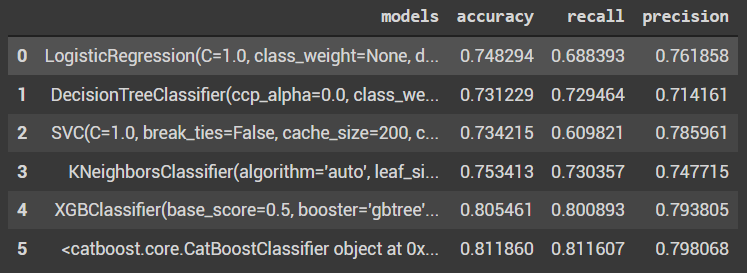

## Реализация моделей с учетом обработки категориальных признаков и масштабированием данных, а также с применением отбора признакаов и подбором гипер параметров для модели

Посмотрим на наши данные после преобразования категориальных признаков, но не будем пока применять к ним масштабирование.

**Можно ли назвать все признаки полностью независимыми друг от друга?** Скорее всего нет.
Так как в реальной жизни, ваша зарплата напрмямую зависит от должность или место работы, от опыта работы. В свою очередь место или должность и уровень доходов зависит от образования и так далее.

Коллинеарными называются признаки, которые сильно коррелируют друг с другом. В машинном обучении это приводит к снижению производительности обобщения данных из-за высокой дисперсии и меньшей интерпретируемости модели.

In [ ]:
df_train.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,57,950,9,1272,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,34,925,13,709,1,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,41,75,1,479,9,-1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,46,4414,18,504,7,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,28,4465,28,769,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,57,technician,married,secondary,no,950,yes,no,cellular,9,jul,1272,1,-1,0,unknown,0
1,34,technician,single,tertiary,no,925,yes,no,cellular,13,apr,709,1,-1,0,unknown,1
2,41,blue-collar,single,secondary,no,75,yes,no,unknown,1,jul,479,9,-1,0,unknown,1
3,46,technician,single,tertiary,no,4414,no,no,cellular,18,aug,504,7,-1,0,unknown,1
4,28,unknown,single,secondary,no,4465,no,no,cellular,28,jan,769,1,-1,0,unknown,1


['secondary', 'tertiary', 'primary', 'unknown']


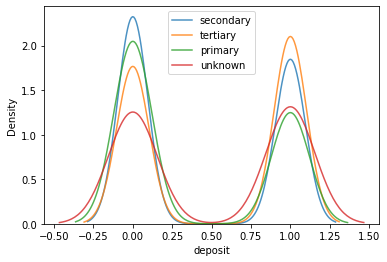

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

types = data['education'].value_counts()
types = list(types.index)
print(types)

for b_type in types:
    subset = data[data['education'] == b_type]

    sns.kdeplot(subset['deposit'].dropna(),
               label = b_type, shade = False, alpha = 0.8);

plt.legend()

['no', 'yes']


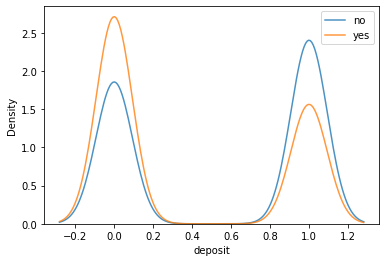

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

types = data['housing'].value_counts()
types = list(types.index)
print(types)

for b_type in types:
    subset = data[data['housing'] == b_type]

    sns.kdeplot(subset['deposit'].dropna(),
               label = b_type, shade = False, alpha = 0.8);

plt.legend()

Чтобы численно оценить степень влияния признаков можно использовать ***коэффициент корреляции Пирсона***. 

Это мера степени и положительности линейных связей между двумя переменными.  Значение в **+1** означает идеальную пропорциональность между значениями признаков и, соответственно, в **-1** аналогично, но с отрицательным коэффициентом.

In [ ]:
correlations_data = df_train.corr()['deposit'].sort_values()
correlations_data

contact_unknown       -0.251947
poutcome_unknown      -0.235052
housing_yes           -0.198328
month_may             -0.163703
campaign              -0.125570
loan_yes              -0.108961
job_blue-collar       -0.101003
marital_married       -0.085998
education_primary     -0.072653
education_secondary   -0.055489
day                   -0.051640
job_services          -0.050558
month_jul             -0.049669
job_entrepreneur      -0.047200
default_yes           -0.038357
month_nov             -0.034886
job_housemaid         -0.030087
month_jan             -0.019137
month_jun             -0.017257
month_aug             -0.015106
job_technician        -0.003670
marital_divorced      -0.002241
job_self-employed     -0.000896
job_admin.             0.004742
contact_telephone      0.010710
job_unknown            0.012567
education_unknown      0.017400
job_unemployed         0.022857
age                    0.030548
poutcome_failure       0.034517
default_no             0.038357
poutcome

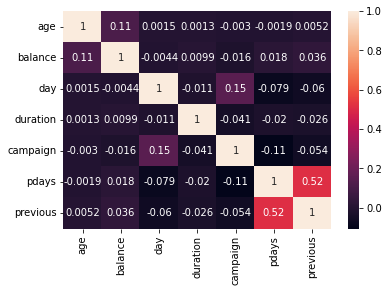

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# data - это данные без кодировки категориальных признаков

cols = list(data.columns)
cols.pop(len(cols)-1)
hm = sns.heatmap(data[cols].corr(), cbar=True, annot=True)

Существует много разных способов отбора признаков:
1. **Одномерный отбор признаков**

Признаки, имеющие наиболее выраженную взаимосвязь с целевой переменной, могут быть отобраны с помощью статистических критериев. Библиотека scikit-learn содержит класс SelectKBest, реализующий одномерный отбор признаков (univariate feature selection). Этот класс можно применять совместно с различными статистическими критериями для отбора заданного количества признаков.

2. **Рекурсивное исключение признаков**

Метод рекурсивного исключения признаков (recursive feature elimination, RFE) реализует следующий алгоритм: модель обучается на исходном наборе признаков и оценивает их значимость, затем исключается один или несколько наименее значимых признаков, модель обучается на оставшихся признаках, и так далее, пока не останется заданное количество лучших признаков. В документации scikit-learn вы можете подробнее прочитать о классе RFE.

3. **Метод главных компонент**

Метод главных компонент (principal component analysis, PCA) позволяет уменьшить размерность данных с помощью преобразования на основе линейной алгебры. Пользователь может задать требуемое количество измерений (главных компонент) в результирующих данных.

In [ ]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

cols = list(df_train.drop(columns=['deposit']).columns)
print(cols)

X = df_train[cols].values
Y = df_train['deposit'].tolist()

# feature extraction

model = CatBoostClassifier()
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)

In [ ]:
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)


Num Features: 10
Selected Features: [ True  True  True  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False  True False
 False False False False False False False  True False False False False
 False  True False]
Feature Ranking: [ 1  1  1  1  1  1  8 20 22 36 38 21 37 39 25 31 23 42 41 29 15 27 16 33
 18 35 40 28 12  1 26 17  6 34  1  7  4 24  5 13  3 10 11  1  2  9 14 30
 32  1 19]


In [ ]:
df_rfe = pd.DataFrame({'feature': cols, 'rfe_label': fit.support_, 'rfe_score': fit.ranking_})
df_true = df_rfe[df_rfe['rfe_score']==True]
df_true

,feature,rfe_label,rfe_score
0,age,True,1
1,balance,True,1
2,day,True,1
3,duration,True,1
4,campaign,True,1
5,pdays,True,1
29,housing_yes,True,1
34,contact_unknown,True,1
43,month_may,True,1
49,poutcome_success,True,1


Таким образом, отбор с помощью RFE вернул нам наиболее важные признаки, т.е. те которые вносят наибольший вклад.

Они помечены как True, 1 - первый приоритет.

Соответсвенно, отсортировав по колонке rfe_score мы сможем увидеть приоритет по каждому признаку.

In [ ]:
# Проверем какие метрики нам выдаст модель на отобранных признаках
# Предварительно применим масштабирование признаков 

cols = list(df_true['feature'].values)

X = df_train[cols]
Y = df_train['deposit']

# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit on the training data
scaler.fit(X)
# Transform both the training and testing data
X_norm = scaler.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, y, test_size=0.3)

catboost = CatBoostClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [ ]:
print(accuracy_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(precision_score(Y_test, y_pred))

0.8391638225255973
0.8474280732345248
0.82793867120954


Как мы видим отбор признаков в целом снизил результаты модели.
Это связано в том числе, потому что у нас в данных нет сильной корреляции данных.

1. GridSearch()
2. RandomSearch()

Методы подбора гиперпарметров для моделей.